# DD2424 Assignment 2

**Authors:** Navid Farhadi (nfarhadi@kth.se)

**Course Instance:** DD2424 Deep Learning in Data Science VT19

### Exercise I: Computing the Gradient

The gradient of $W$ and $b$ is computed using the `computeGradients()` function. I was able to successfully write this function and the other necessary functions needed in order to compute the gradients of $W$ and $b$. In order to verify that the functions were written correctly I wrote the `computeGradientsNumerically()` function that computes the gradients using the finite difference method as well as the `compareGradients()` method that finds the relative error between the numerically computer gradient and analytically computed gradient.

Unfortunately `computeGradientsNumerically()` takes a very long time to run when using the entire data set so I tested the function using only subsets of the data with reduced dimensionality:

In [8]:
X,Y,y = loadBatch("data_batch_1")
W1,W2,b1,b2 = initialize()

In [9]:
compareGradients(X[:20,0:2], Y[:,0:2], W1[:,0:20], W2, b1, b2, 0)

Relative error for W1: 1.2084068272105019e-05
Relative error for W2: 2.02160074335144e-07
Relative error for b1: 2.4461784993705816e-06
Relative error for b2: 4.499778327768378e-06


In [10]:
compareGradients(X[:200,0:20], Y[:,0:20], W1[:,0:200], W2, b1, b2, 0)

Relative error for W1: 0.0003917012252757579
Relative error for W2: 6.254330387008006e-06
Relative error for b1: 2.3045757849979786e-06
Relative error for b2: 4.487077376264751e-06


The relative errors for $W_1$, $W_2$, $b_1$, and $b_2$ are quite small so the `computeGradients()` function should be written correctly.

### Exercise II: Replicating Figures 3 and 4

The results for replicating figure 3 and 4 are below, as well as the hyper-parameter settings.

#### Figure 3

$\eta_{min} = 10^{-5}$, $\eta_{max} = 10^{-1}$, $\lambda = 0.01$, n\_s = 500, n\_cycles = 1

Final test accuracy: 46.52 %


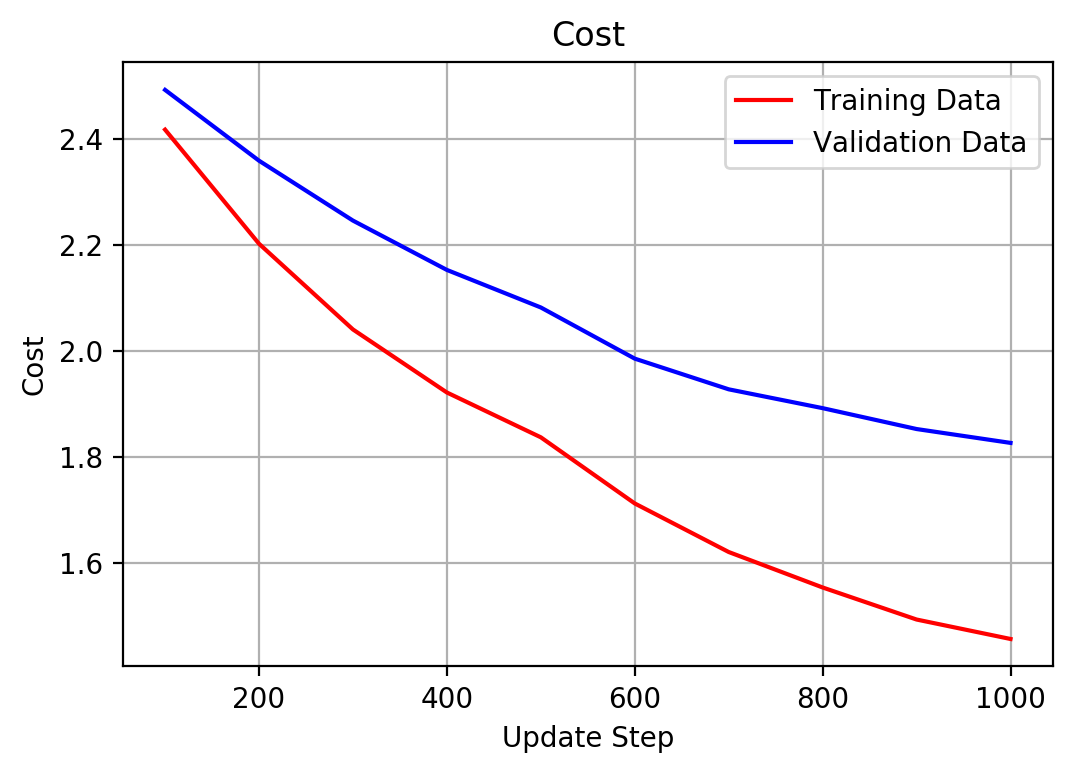

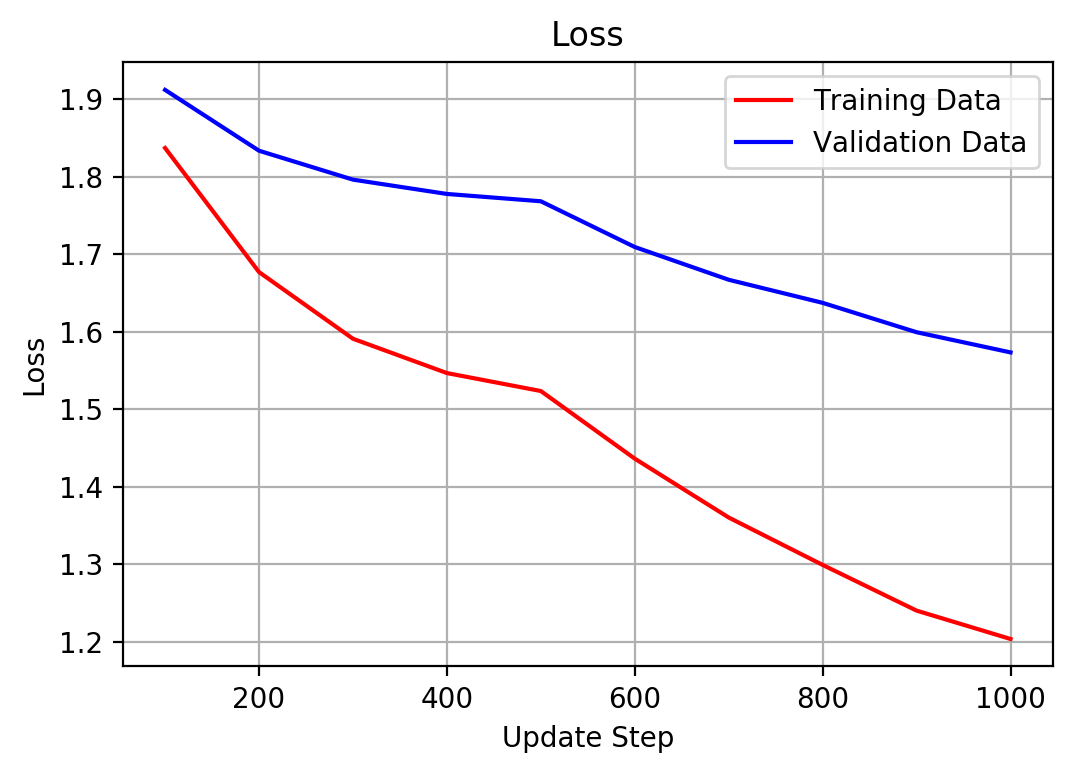

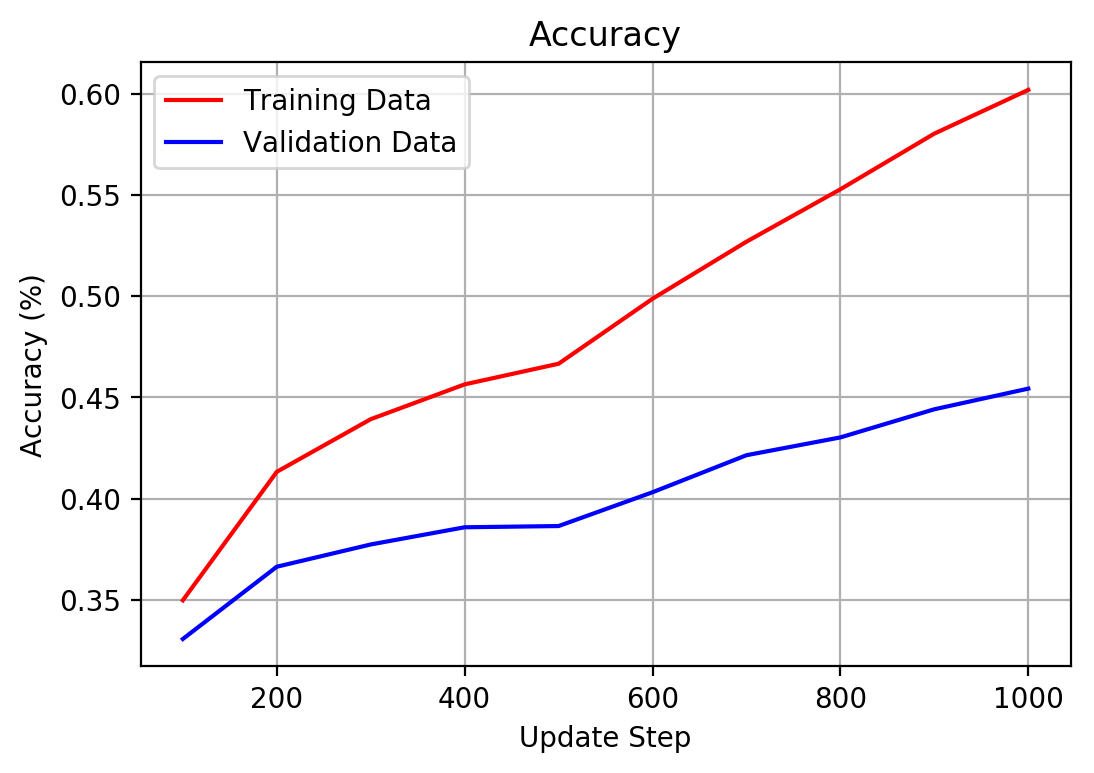

In [19]:
run(0.01,0.00001,500,1,"small")

#### Figure 4

$\eta_{min} = 10^{-5}$, $\eta_{max} = 10^{-1}$, $\lambda = 0.01$, n\_s = 800, n\_cycles = 3

Final test accuracy: 46.739999999999995 %


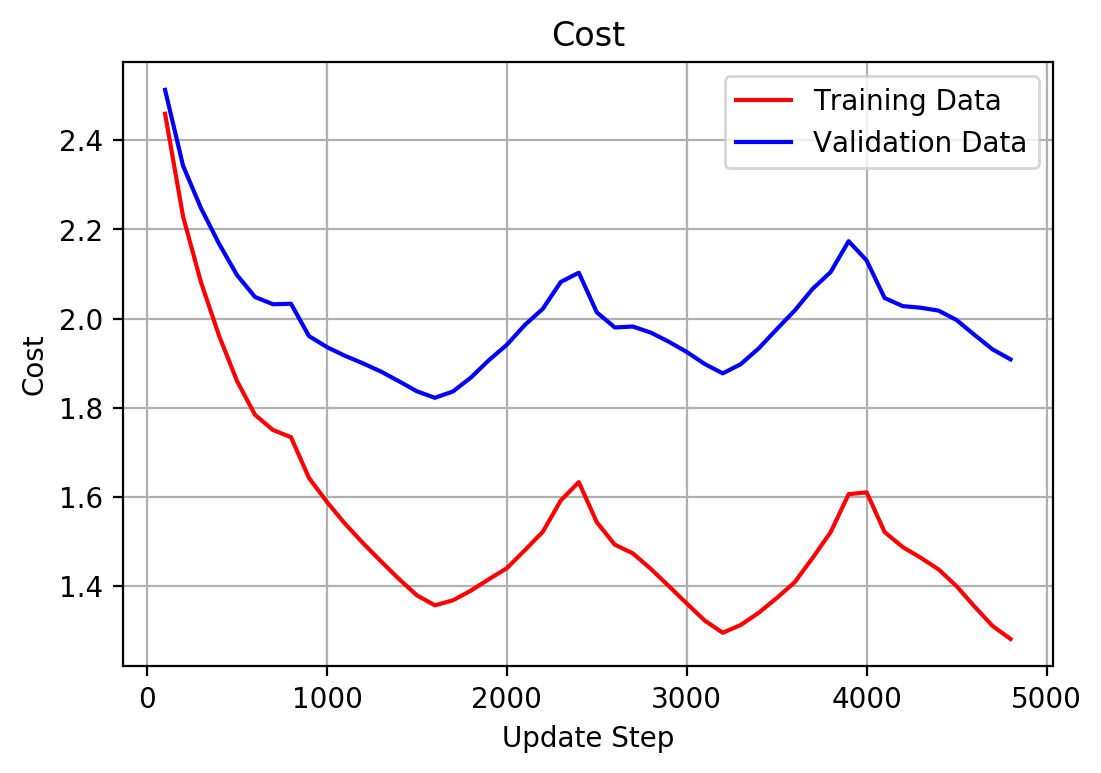

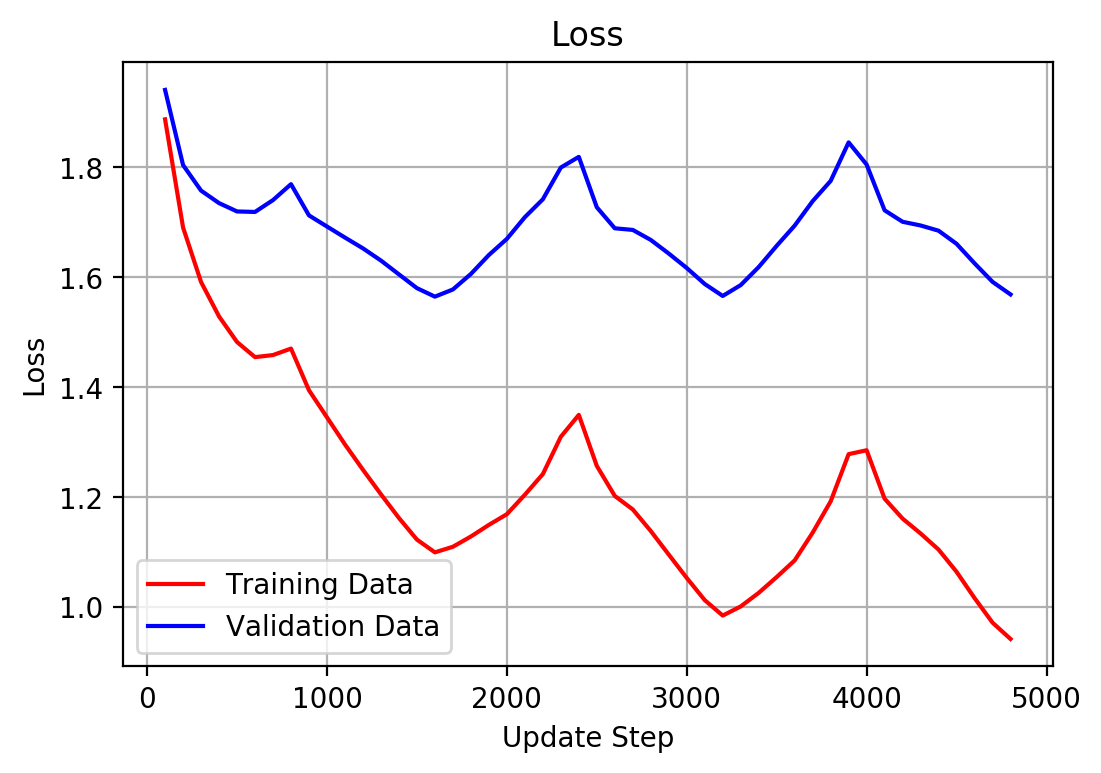

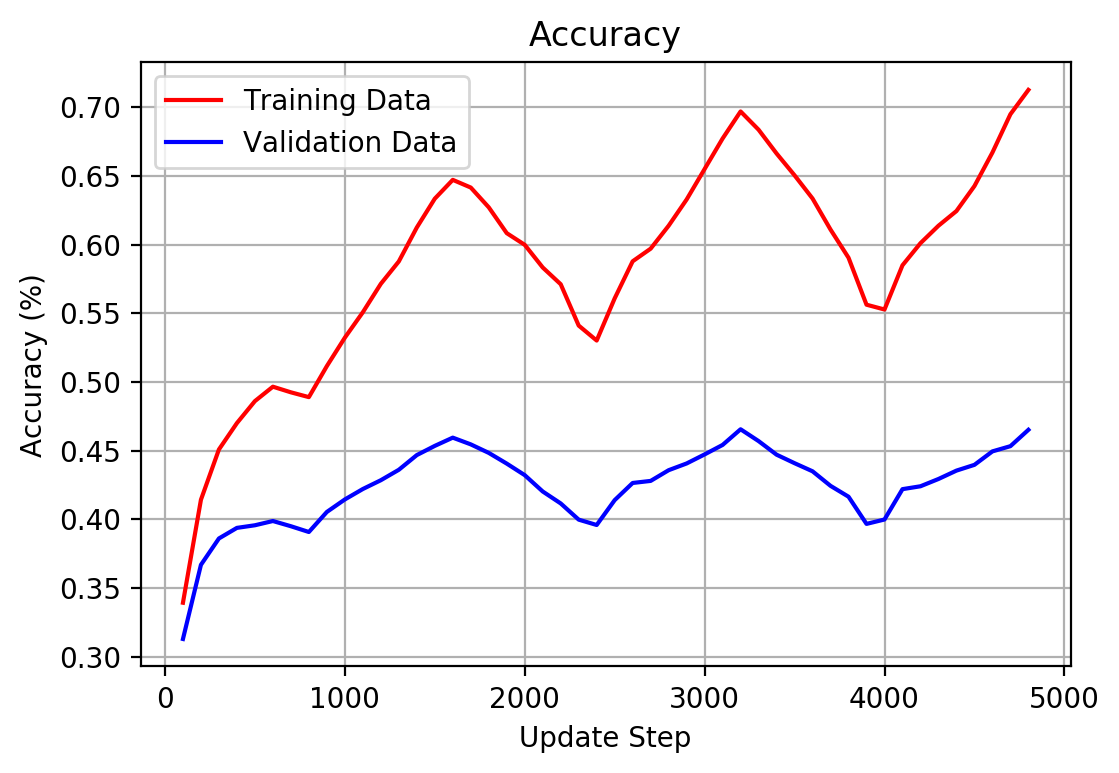

In [20]:
run(0.01,0.00001,800,3,"small")

### Exercise III: Course Search for Lambda

I searched for 10 lambdas in the range $\lambda_{min}$ to $\lambda_{max}$

Hyper-parameter settings:

$\lambda_{min} = 10^{-5}$

$\lambda_{max} = 10^{-1}$

n\_s = $2 \cdot floor($n/n_batch) 

n\_cycles = 2

In [23]:
findLambdas(10,-5, -1, 0.00001, 2)


Three Best Performing Networks (by validation accuracy) 
eta = 1e-05, n_cycles = 2, n_s = 900
---
Lambda: 0.005046454822863594
Test Accuracy: 0.5143
Best Validation Accuracy: 0.5212
Best Training Accuracy: 0.5625333333333333

Lambda: 0.0010375568576985593
Test Accuracy: 0.5177
Best Validation Accuracy: 0.5192
Best Training Accuracy: 0.5872666666666667

Lambda: 0.0009883817686337849
Test Accuracy: 0.5103
Best Validation Accuracy: 0.5192
Best Training Accuracy: 0.5847111111111111



### Exercise IV: Fine Search for Lambda

Based on my results from the course search, I searched for 10 lambdas in the range $\lambda_{min}$ to $\lambda_{max}$ but with a narrower range than the course search. I also increased the number of cycles.

Hyper-parameter settings:

$\lambda_{min} = 10^{-4}$

$\lambda_{max} = 10^{-2}$

n\_s = $2 \cdot floor($n/n_batch) 

n\_cycles = 4

In [24]:
findLambdas(10,-4, -2, 0.00001, 4)


Three Best Performing Networks (by validation accuracy) 
eta = 1e-05, n_cycles = 4, n_s = 900
---
Lambda: 0.001835899739367048
Test Accuracy: 0.5205
Best Validation Accuracy: 0.5272
Best Training Accuracy: 0.6112666666666666

Lambda: 0.000655025114869056
Test Accuracy: 0.5108
Best Validation Accuracy: 0.527
Best Training Accuracy: 0.6239777777777777

Lambda: 0.005366975251161154
Test Accuracy: 0.5231
Best Validation Accuracy: 0.5268
Best Training Accuracy: 0.5754444444444444



### Exercise V: Results on the Best Lambda

$\eta_{min} = 10^{-5}$, $\eta_{max} = 10^{-1}$, $\lambda = 0.001835899739367048$, n\_s = 980, n\_cycles = 3

Final test accuracy: 51.81 %


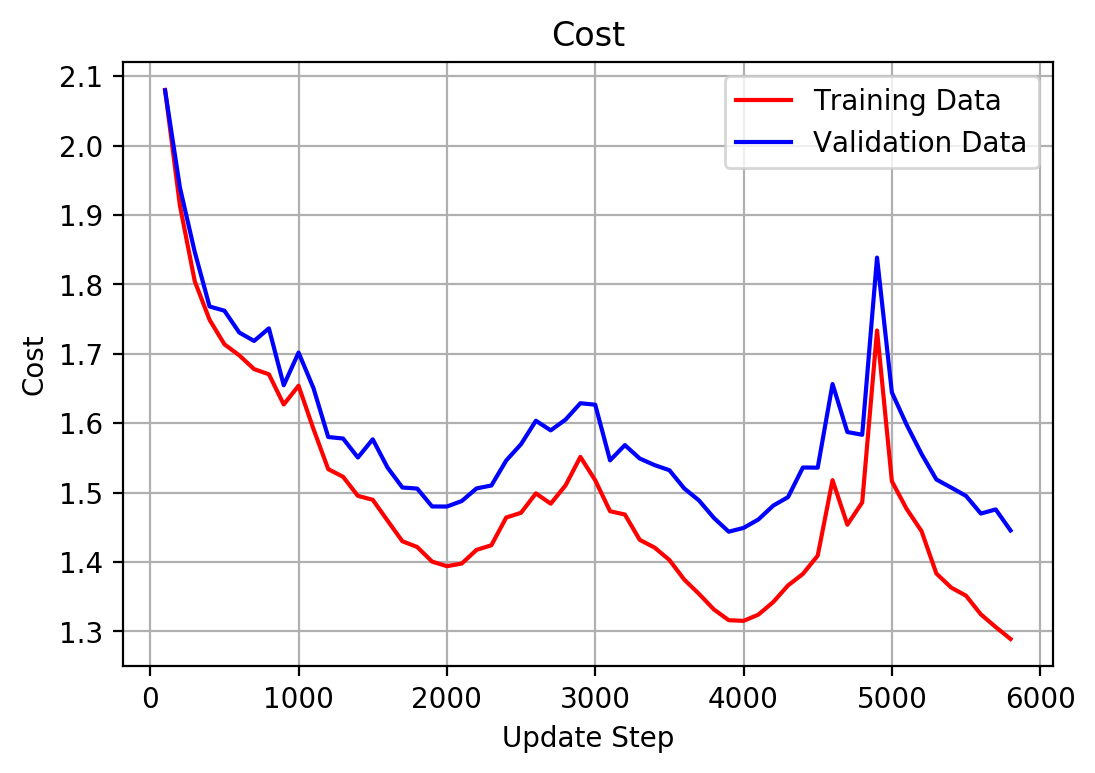

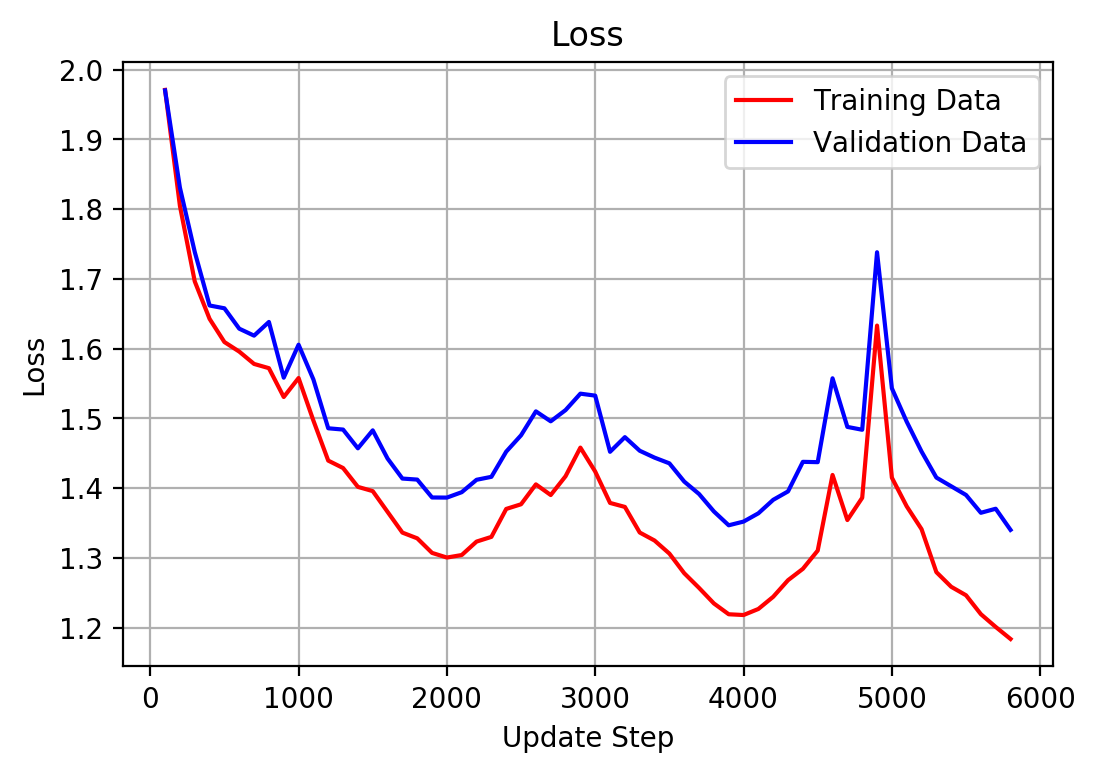

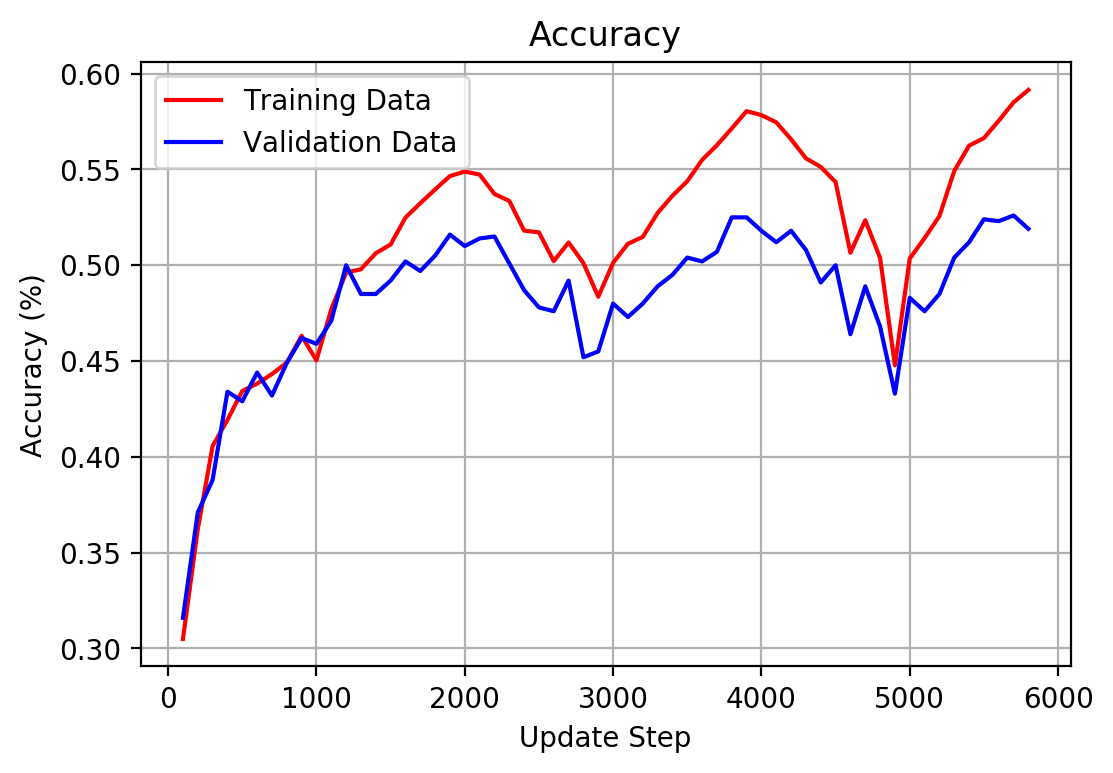

In [27]:
run(0.001835899739367048,0.00001,980,3,"bigger")

### Implementation

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

N = 10000
d = 3072
k = 10
m = 50
eps = np.finfo(float).eps
eta_min = 1e-5
eta_max = 1e-1
n_batch = 100

def loadBatch(filename):
    with open("./cifar-10-batches-py/" + filename, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    X = np.array(dict[b'data']/255).T
    X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

    y = np.array(dict[b'labels'])
    
    Y = np.zeros((k,N))
    for i in range(N):
        Y[y[i]][i] = 1
    
    fo.close()
    return X,Y,y

def initialize():
    W1 = np.random.normal(0.0, 1/np.sqrt(d), (m,d))
    W2 = np.random.normal(0.0, 1/np.sqrt(m), (k,m))
    b1 = np.zeros((m,1))
    b2 = np.zeros((k,1))

    return W1, W2, b1, b2

def evaluateClassifier(X, W1, W2, b1, b2):
    s1 = np.dot(W1, X) + b1
    h = np.maximum(0,s1)
    s = np.dot(W2, h) + b2
    P = np.exp(s) / np.sum(np.exp(s), axis=0)
    return P,h

def computeCost(P, Y, W1, W2, l):
    p_y = np.multiply(Y,P).sum(axis=0)
    p_y[p_y == 0] = eps

    loss = -np.log(p_y).sum() / P.shape[1]
    cost = loss + l * (np.power(W1,2).sum() + np.power(W2,2).sum())
    return loss, cost

def computeAccuracy(P, y):
    predictions = np.argmax(P, axis=0)
    return np.sum(predictions == y) / P.shape[1]

def computeGradients(X, Y, W1, W2, b1, b2, l):
    grad_W1 = np.zeros_like(W1)
    grad_W2 = np.zeros_like(W2)
    grad_b1 = np.zeros_like(b1)
    grad_b2 = np.zeros_like(b2)
    
    P,h = evaluateClassifier(X,W1,W2,b1,b2)
    g = -(Y-P)
    grad_b2 = np.dot(g,np.ones((X.shape[1],1))) / X.shape[1]
    grad_W2 = np.add(np.dot(g,h.T) / X.shape[1], 2*l*W2)

    g = np.multiply(np.dot(W2.T,g),1*(h>0))
    grad_b1 = np.dot(g,np.ones((X.shape[1],1))) / X.shape[1]
    grad_W1 = np.add(np.dot(g,X.T) / X.shape[1], 2*l*W1)

    return grad_W1, grad_W2, grad_b1, grad_b2

def computeGradientsNumerically(X,Y,W1,W2,b1,b2,l):
    grad_W1 = np.zeros_like(W1)
    grad_W2 = np.zeros_like(W2)
    grad_b1 = np.zeros_like(b1)
    grad_b2 = np.zeros_like(b2)

    P,_ = evaluateClassifier(X,W1,W2,b1,b2)
    _,cost = computeCost(P,Y,W1,W2,l)
    h = 1e-5

    for i in range(b1.shape[0]):
        b1[i] += h
        P,_ = evaluateClassifier(X,W1,W2,b1,b2)
        _,c2 = computeCost(P,Y,W1,W2,l)
        grad_b1[i] = (c2 - cost) / h
        b1[i] -= h
    
    for i in range(b2.shape[0]):
        b2[i] += h
        P,_ = evaluateClassifier(X,W1,W2,b1,b2)
        _,c2 = computeCost(P,Y,W1,W2,l)
        grad_b2[i] = (c2 - cost) / h
        b2[i] -= h

    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1[i][j] += h
            P,_ = evaluateClassifier(X,W1,W2,b1,b2)
            _,c2 = computeCost(P,Y,W1,W2,l)
            grad_W1[i][j] = (c2 - cost) / h
            W1[i][j] -= h
    
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2[i][j] += h
            P,_ = evaluateClassifier(X,W1,W2,b1,b2)
            _,c2 = computeCost(P,Y,W1,W2,l)
            grad_W2[i][j] = (c2 - cost) / h
            W2[i][j] -= h

    return grad_W1, grad_W2, grad_b1, grad_b2

def compareGradients(X,Y,W1,W2,b1,b2,l):
    grad_W1, grad_W2, grad_b1, grad_b2 = computeGradients(X,Y,W1,W2,b1,b2,l)
    grad_W1_num, grad_W2_num, grad_b1_num, grad_b2_num = computeGradientsNumerically(X,Y,W1,W2,b1,b2,l)
    print("Relative error for W1: " + str(np.abs(grad_W1 - grad_W1_num).sum()))
    print("Relative error for W2: " + str(np.abs(grad_W2 - grad_W2_num).sum()))
    print("Relative error for b1: " + str(np.abs(grad_b1 - grad_b1_num).sum()))
    print("Relative error for b2: " + str(np.abs(grad_b2 - grad_b2_num).sum()))

def cycleETA(t, l_cycles, n_s, eta):
    eta_lower = 2*l_cycles*n_s
    eta_mid = (2*l_cycles + 1) * n_s
    eta_upper = 2*(l_cycles + 1) * n_s
    eta_range = eta_max - eta_min

    if (eta_lower <= t) and (t <= eta_mid):
        eta = eta_min + eta_range*(t-eta_lower)/n_s
    elif (eta_mid <= t) and (t <= eta_upper):
        eta = eta_max - eta_range*(t-eta_mid)/n_s
    
    return eta

def getData(data_set):
    X,Y,y = loadBatch("data_batch_1")

    if data_set == "big":
        for i in range(2,6):
            X_temp, Y_temp, y_temp = loadBatch("data_batch_" + str(i))
            X = np.append(X,X_temp,axis=1)
            Y = np.append(Y,Y_temp,axis=1)
            y = np.append(y,y_temp,axis=0)
        X,X_val = np.split(X,[45000],axis=1)
        Y,Y_val = np.split(Y,[45000],axis=1)
        y,y_val = np.split(y,[45000],axis=0)
    elif data_set == "bigger":
        for i in range(2,6):
            X_temp, Y_temp, y_temp = loadBatch("data_batch_" + str(i))
            X = np.append(X,X_temp,axis=1)
            Y = np.append(Y,Y_temp,axis=1)
            y = np.append(y,y_temp,axis=0)
        X,X_val = np.split(X,[49000],axis=1)
        Y,Y_val = np.split(Y,[49000],axis=1)
        y,y_val = np.split(y,[49000],axis=0)
    else:
        X_val, Y_val, y_val = loadBatch("data_batch_2")
    
    X_test, Y_test, y_test = loadBatch("test_batch")

    return X, Y, y, X_val, Y_val, y_val, X_test, Y_test, y_test
    
def miniBatch(W1, W2, b1, b2, l, eta, n_s, n_cycles, data_set):
    X, Y, y, X_val, Y_val, y_val, X_test, Y_test, y_test = getData(data_set)

    train_acc = []
    train_loss = []
    train_cost = []
    val_acc = []
    val_loss = []
    val_cost = []
    iterations = []

    t = 0
    l_cycles = -1

    n_epochs = math.ceil(2*n_cycles*n_s/(X.shape[1]/n_batch))

    for i in range(n_epochs):
        for j in range(0, X.shape[1], n_batch):
            grad_W1, grad_W2, grad_b1, grad_b2 = computeGradients(X[:,j:j+n_batch],Y[:,j:j+n_batch],W1,W2,b1,b2,l)
            W1 -= eta*grad_W1
            W2 -= eta*grad_W2
            b1 -= eta*grad_b1
            b2 -= eta*grad_b2

            if t % (2 * n_s) == 0:
                l_cycles += 1
            
            eta = cycleETA(t,l_cycles,n_s, eta)
            t += 1

            if(t % 100 == 0):
                iterations.append(t)
                P,_ = evaluateClassifier(X,W1,W2,b1,b2)
                P_val, _ = evaluateClassifier(X_val,W1,W2,b1,b2)
        
                train_acc.append(computeAccuracy(P,y))
                val_acc.append(computeAccuracy(P_val,y_val))

                temp_loss, temp_cost = computeCost(P,Y,W1,W2,l)
                train_loss.append(temp_loss)
                train_cost.append(temp_cost)

                temp_loss, temp_cost = computeCost(P_val,Y_val,W1,W2,l)
                val_loss.append(temp_loss)
                val_cost.append(temp_cost)

    P_test,_ = evaluateClassifier(X_test,W1,W2,b1,b2)
    test_acc = computeAccuracy(P_test,y_test)
    test_loss = computeCost(P_test,Y_test,W1,W2,l)

    return train_acc, train_loss, train_cost, val_acc, val_loss, val_cost, test_acc, test_loss, iterations

def run(l, eta, n_s, n_cycles, data_set):
    W1,W2,b1,b2 = initialize()
    train_acc, train_loss, train_cost, val_acc, val_loss, val_cost, test_acc, test_loss, iterations = miniBatch(W1,W2,b1,b2,l,eta,n_s,n_cycles,data_set)

    print("Final test accuracy: " + str(test_acc*100) + " %")
    
    plt.rcParams['figure.dpi'] = 100
    
    plt.figure(1)
    plt.plot(iterations, train_cost, "r-", label="Training Data")
    plt.plot(iterations, val_cost, "b-", label="Validation Data")
    plt.title("Cost")
    plt.xlabel("Update Step")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid("true")
    plt.show()

    plt.figure(2)
    plt.plot(iterations, train_loss, "r-", label="Training Data")
    plt.plot(iterations, val_loss, "b-", label="Validation Data")
    plt.title("Loss")
    plt.xlabel("Update Step")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid("true")
    plt.show()

    plt.figure(3)
    plt.plot(iterations, train_acc, "r-", label="Training Data")
    plt.plot(iterations, val_acc, "b-", label="Validation Data")
    plt.title("Accuracy")
    plt.xlabel("Update Step")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid("true")
    plt.show()

def findLambdas(n_lambda,lambda_min,lambda_max,eta,n_cycles):
    lambda_range = lambda_max - lambda_min
    n_s = 2 * math.floor(45000 / n_batch)
    
    lambdas = []
    testAcc = []
    trainAcc = []
    valAcc = []

    for i in range(n_lambda):
        W1,W2,b1,b2 = initialize()
        _lambda = math.pow(10,lambda_min + lambda_range * np.random.rand())
        train_acc, train_loss, train_cost, val_acc, val_loss, val_cost, test_acc, test_loss, iterations = miniBatch(W1,W2,b1,b2,_lambda,eta,n_s,n_cycles,"big")
        lambdas.append(_lambda)
        testAcc.append(test_acc)
        trainAcc.append(max(train_acc))
        valAcc.append(max(val_acc))
    
    results = sorted(zip(valAcc,testAcc,trainAcc,lambdas), reverse=True)[:3]
    print()
    print("Three Best Performing Networks (by validation accuracy) ")
    print("eta = " + str(eta) + ", n_cycles = " + str(n_cycles) + ", n_s = " + str(n_s))
    print("---")

    for valacc,testacc,trainacc,_l in results:
        print("Lambda: " + str(_l))
        print("Test Accuracy: " + str(testacc))
        print("Best Validation Accuracy: " + str(valacc))
        print("Best Training Accuracy: " + str(trainacc))
        print()